# Traffice Sign classification

## Steps:
### 1. Finding Data on kaggle and loading it into notebook
### 2. Preprocessing the images and visualizing them
### 3. Finding out the mean of the Dimension and Resizing all image accordingly
### 4.Convert the images into a numpy array and normalize them
### 5. Checking Class Imbalance
### 6. Splitting the Data and performing one-HOT encoding
### 7. Creating the model architecture, compiling the model and Then Fitting it
### 8. Plotting the accuracy and loss against each epoch
### 9. Preprocessing the test Data and Make Prediction on it
### 10. Visualizing the original and predicted label for the Test images



## Usecase

#### This model can be used in self driving cars which will enable them to automatically recognize traffic signs similarly the driver alert system inside cars will help and protect drivers by understanding the traffic signs around them

In [1]:
#Run this cell and select the kaggle.json file downloaded from the kaggle account settings page
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"purusottam567","key":"db8c9f42a78efc76638f832715c7fa43"}'}

In [2]:
# Next install the kaggle API client
!pip install -q kaggle

In [3]:
#The kaggle API client expects this file to be in ~/.kaggle, so move it there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#This permission change avoids a warning on kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [5]:
#searching for data set
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          87188        986  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          11405        255  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            402          9  0.75             
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [6]:
# Downloading dataset and comming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

 99% 606M/612M [00:03<00:00, 281MB/s]
100% 612M/612M [00:03<00:00, 174MB/s]
/content


In [7]:
#Unziping download file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm -rf traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [8]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

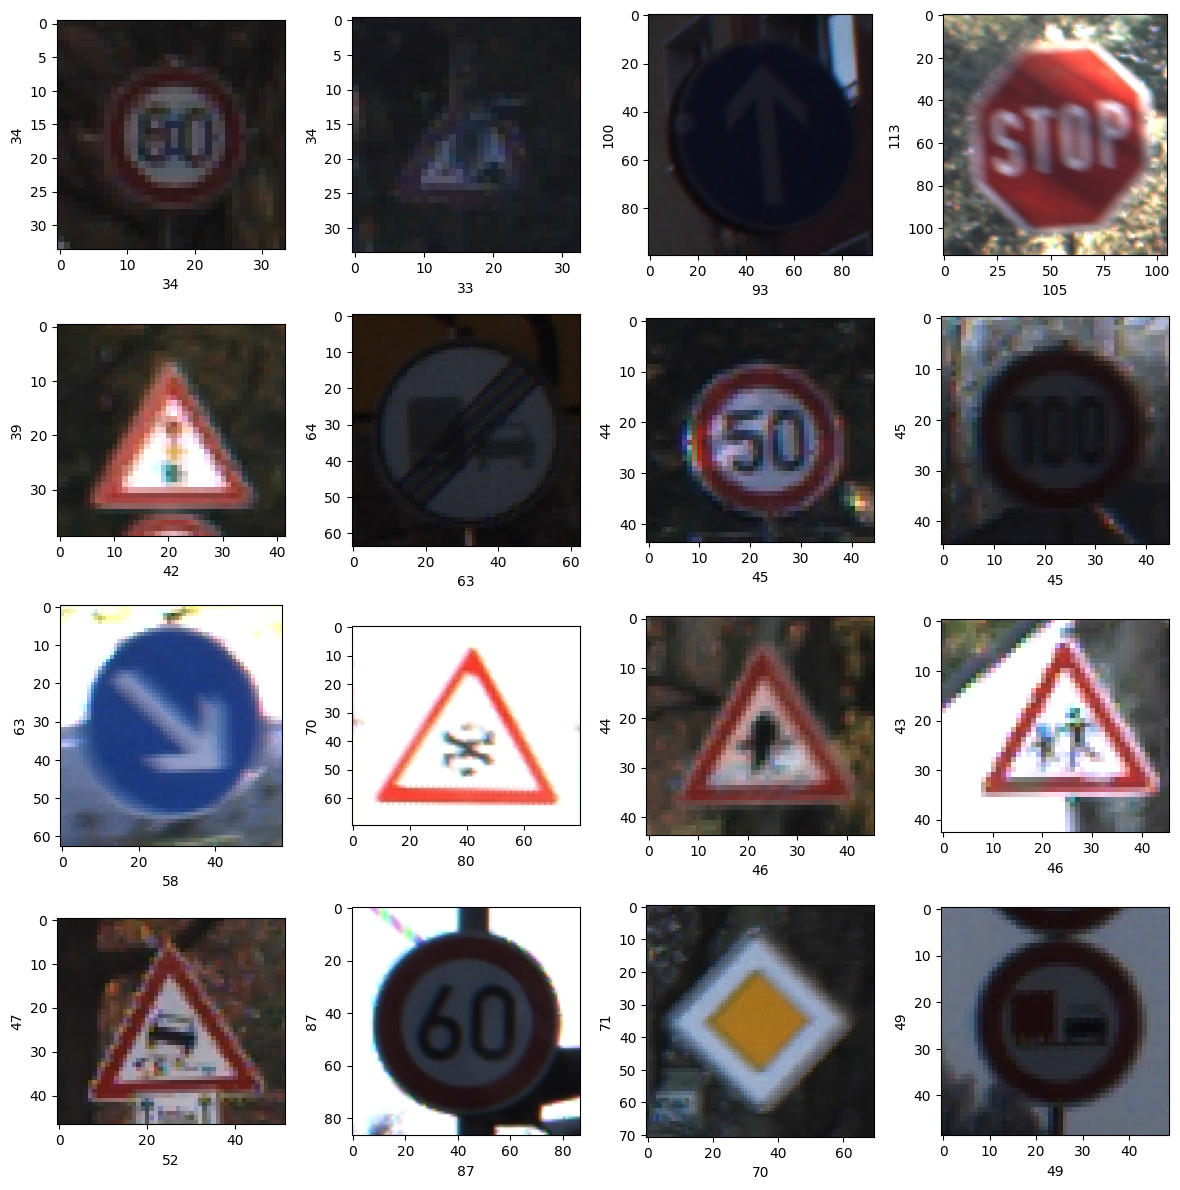

In [9]:
# Ploting 12 images to checkout datasets
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1],fontsize=10)#width of image
    plt.ylabel(rand_img.shape[0],fontsize=10) # height of image



In [10]:
# As size of images are different we have to make them equal so we will take mean of dimension
dim1 = []
dim2 = []
for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [11]:
# find the mean of dimension
print("Dimension 1 Mean:",np.mean(dim1),"Dimension2 Mean:",np.mean(dim2))

Dimension 1 Mean: 50.328929582493814 Dimension2 Mean: 50.83587951745773


In [12]:
#Now we will reshape the images to (50,50)
images = []
label_id = []
for i in range(43):
    labels = 'traffic_sign_dataset/Train'+'/{0}'.format(i)
    image_path= os.listdir(labels)
    for x in image_path:
        img = Image.open(labels+ '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)


In [13]:
#Converting images into numpy array
images = np.array(images)
#the pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the value 0 and 1 this is known as Normalization
images = images/255

In [14]:
#Storing the label ids into numpy array and printing the shape
label_id = np.array(label_id)
label_id.shape

(39209,)

In [15]:
 #checking the shape of images
images.shape

(39209, 50, 50, 3)

In [16]:
 #visualize the number of class count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [17]:
#split the data

x_train,x_val,y_train,y_val = train_test_split(images,label_id,test_size = 0.2,random_state = 42)

In [18]:
# Keras has a built-in function for one-hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
#this above code convert the classes column into categorical using to_categorical() function

In [19]:
#Defining the model architecture
model = Sequential()
model.add(Conv2D(filters = 64,kernel_size=(3,3),input_shape = x_train.shape[1:],activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))

In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 flatten (Flatten)           (None, 7744)              0

In [21]:
model.fit(x_train,y_train,epochs=50,batch_size = 120,validation_data = (x_val,y_val),verbose = 2)

Epoch 1/50
262/262 - 18s - loss: 2.0464 - accuracy: 0.4384 - val_loss: 0.6375 - val_accuracy: 0.8375 - 18s/epoch - 68ms/step
Epoch 2/50
262/262 - 4s - loss: 0.7594 - accuracy: 0.7638 - val_loss: 0.2613 - val_accuracy: 0.9440 - 4s/epoch - 17ms/step
Epoch 3/50
262/262 - 5s - loss: 0.4960 - accuracy: 0.8438 - val_loss: 0.1414 - val_accuracy: 0.9713 - 5s/epoch - 18ms/step
Epoch 4/50
262/262 - 5s - loss: 0.3870 - accuracy: 0.8792 - val_loss: 0.1104 - val_accuracy: 0.9792 - 5s/epoch - 18ms/step
Epoch 5/50
262/262 - 5s - loss: 0.3092 - accuracy: 0.9023 - val_loss: 0.0784 - val_accuracy: 0.9833 - 5s/epoch - 18ms/step
Epoch 6/50
262/262 - 6s - loss: 0.2718 - accuracy: 0.9171 - val_loss: 0.0815 - val_accuracy: 0.9851 - 6s/epoch - 24ms/step
Epoch 7/50
262/262 - 5s - loss: 0.2426 - accuracy: 0.9246 - val_loss: 0.0741 - val_accuracy: 0.9838 - 5s/epoch - 21ms/step
Epoch 8/50
262/262 - 5s - loss: 0.2156 - accuracy: 0.9315 - val_loss: 0.0596 - val_accuracy: 0.9872 - 5s/epoch - 17ms/step
Epoch 9/50
262

<Axes: >

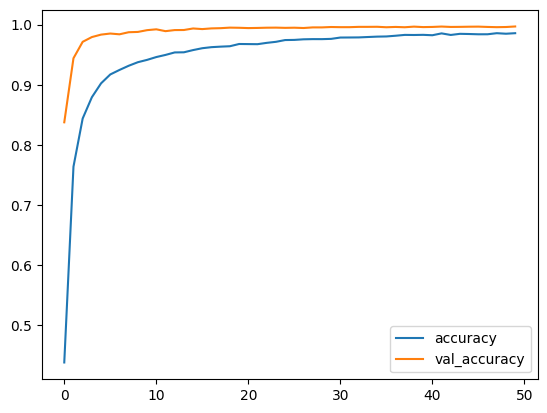

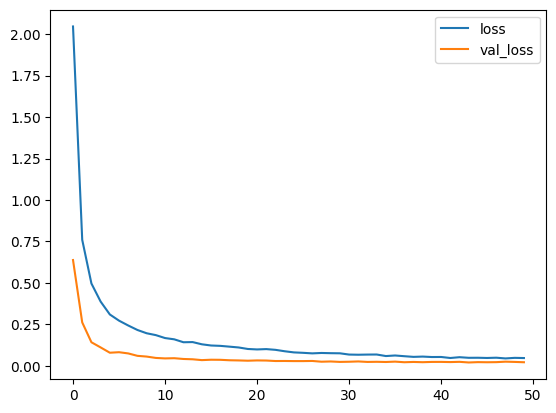

In [23]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

In [24]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [26]:
# defining a function that will scale images so that we will make image same as train images
from PIL import Image
def scaling(test_images,test_path):
  images = []
  image_path = test_images
  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)

  #converting images into numpy array
  images = np.array(images)
  #The pixel value of each image ranges between 0 and 255
  #Dividing each image by 255 will scale the value between 0 and 1 this is known as normalization
  images = images/255
  return images

In [27]:
#callingabove created function on test images
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [28]:
# read label ids from Test.csv and store the values of the class id in y_test variable
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [30]:
y_pred = np.argmax(model.predict(test_images), axis=1)
y_pred


395/395 [==============================] - 1s 2ms/step


array([16,  1, 38, ..., 36,  7, 10])

In [31]:
# Storing all lables according tho image classes
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

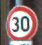

In [32]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [33]:
#original label
print("Original label:",all_labels[y_test[1]])

Original label: Speed limit (30km/h)


In [34]:
# predicted label
print("Predicted label: ",all_labels[y_pred[1]])

Predicted label:  Speed limit (30km/h)
